# Part 2
## Contents

1. [libraries and files](#libraries)
2. [Importing data](#import)
3. [Viewing the class in balance](#inbalance)
4. [KNN](#KNN)

## Libraries
<a id='libraries'></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.model_selection import StratifiedKFold #Something to split and randomise the data 

from sklearn.neighbors import KNeighborsClassifier #Importing knn model

from sklearn import ensemble
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

## Importing data and sorting them
<a id='import'></a>

In [2]:
data = pd.read_csv('Credit/creditdefault_train.csv') #Putting the test data and the train data in data frames 
test = pd.read_csv('Credit/creditdefault_test.csv')

#Seperating the train data labels from the inputs:
y_train = data['Y']
x_train = data.drop(['Y'],axis=1)

#Seperating the test data labels from the inputs:
y_test = test['Y']
x_test = test.drop(['Y'],axis=1)

kf = StratifiedKFold(n_splits=4)
#kf = KFold(15000, n_folds=3)



## Viewing the class in balance
<a id='libraries'></a>

In [3]:
def inbalance(y,classes):
    '''A function that displays the difference in classes in bar graph form'''
    num_classes = np.zeros(len(classes)) # A place to tally all the classes
    for i in range(len(y)):
        num_classes[y[i]] += 1
        
    for i in range(len(classes)):
        print('The total number in class ' + classes[i] + ' is ' + str(num_classes[i]))
    plt.bar(x=classes,height=num_classes) # plotting bar graph
    

### Train data

The total number in class No is 11682.0
The total number in class Yes is 3318.0


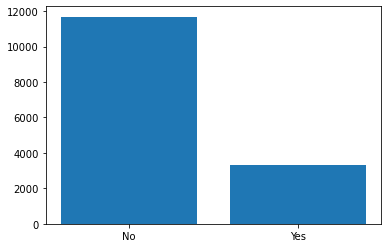

In [4]:
inbalance(y_train,['No','Yes'])

### Test data 

The total number in class No is 11682.0
The total number in class Yes is 3318.0
15000


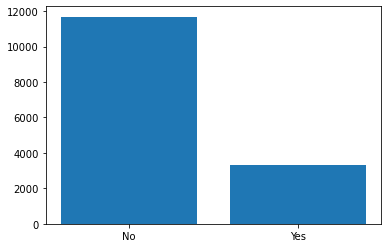

In [5]:
inbalance(y_test,['No','Yes'])
print(len(y_test))

### Conclusions
Because the data has a large class inbalance the metrics used will be sensitive to defualts rather than payments which means I will use precision, recall with respect to each class but with a focus on defulters

## KNN
<a id='KNN'></a>

## Manhatten distance

In [6]:
def metricsGraphknn(default_prec, pay_prec, acc, default_f, pay_f,
                    test_default_prec, test_pay_prec, test_acc, test_default_f, test_pay_f,  parameters):
    word = ['Default Precision','Payed Precision','Accuracy Score','F score default','F score pay']
  
    print('The maximum Default Precision: ' + str(np.amax(default_prec)))
    print('The maximum Payed Precision: ' + str(np.amax(pay_prec)))
    print('The maximum Accuracy Score: ' + str(np.amax(acc)))  
    print('The maximum F score default: ' + str(np.amax(default_f)))  
    print('The maximum F score pay: ' + str(np.amax(pay_f)))  
    
    
    figure,axis = plt.subplots(5,1,figsize=(15,20))
    
    param = range(1,parameters[0])
   
    axis[0].plot(param,default_prec,'ro-',param,test_default_prec,'bv--')
    axis[0].set_title('Default Precision')
    plt.legend(['Training Accuracy','Test Accuracy'])
    
    axis[1].plot(param,pay_prec,'ro-',param,test_pay_prec,'bv--')
    axis[1].set_title('Payed Precision')
    plt.legend(['Training Accuracy','Test Accuracy'])
    
    axis[2].plot(param,acc,'ro-',param,test_acc,'bv--')
    axis[2].set_title('Accuracy Score')
    plt.legend(['Training Accuracy','Test Accuracy'])
    
    axis[3].plot(param,default_f,'ro-',param,test_default_f,'bv--')
    axis[3].set_title('F score default')
    plt.legend(['Training Accuracy','Test Accuracy'])
    
    axis[4].plot(param,pay_f,'ro-',param,test_pay_f,'bv--')
    axis[4].set_title('F score pay')
    plt.legend(['Training Accuracy','Test Accuracy'])
    


In [7]:
def mean(array):
    total = 0
    for i in range(len(array)):
        total += array[i]
    
    return total/len(array)

In [8]:
#Place to store the mean of testing on the fold
default_prec_man = []
pay_prec_man = []
acc_man = []
default_f_measure_man = []
pay_f_measure_man = []

#place to store test results
test_default_prec = []
test_pay = []
test_acc = []
test_default_f = []
test_pay_f = []


for k in range(1,31): #The K nearest neigbours
    #Place to store the raw outputs
    av_prec_default = []
    av_pay_prec = []
    av_acc = []
    av_f_default = []
    av_f_pay = []
    
    
    for train_index, test_index in kf.split(x_train,y_train):# Splitting into three folds
        #Taking the elements and putting them into array
        temp_train_x = np.take(x_train,train_index,0)
        temp_train_y = np.take(y_train,train_index,0)

        temp_test_x = np.take(x_train,test_index,0)
        temp_test_y = np.take(y_train,test_index,0)
    
        knn = KNeighborsClassifier(n_neighbors=k,metric='manhattan') #Building the model
        knn.fit(temp_train_x,temp_train_y)#Training model
        
        prediction = knn.predict(temp_test_x)#Working out predictions
        
        #Storing the output metrics
        av_prec_default.append(precision_score(temp_test_y,prediction))
        av_pay_prec.append(precision_score(temp_test_y,prediction,pos_label=0))
        av_acc.append(accuracy_score(temp_test_y,prediction))
        av_f_default.append(f1_score(temp_test_y,prediction))
        av_f_pay.append(f1_score(temp_test_y,prediction,pos_label=0))
        
        
    #Finding the mean from the storing in the internal loop and storing it to be represented in the graph
    default_prec_man.append(mean(av_prec_default))
    pay_prec_man.append(mean(av_pay_prec))
    acc_man.append(mean(av_acc))
    default_f_measure_man.append(mean(av_f_default))
    pay_f_measure_man.append(mean(av_f_pay))
    
    #Build test model
    testKnn = KNeighborsClassifier(n_neighbors=k,metric='manhattan') #Building the model
    testKnn.fit(x_train,y_train)
    
    pred = testKnn.predict(x_test)
    
    test_default_prec.append( precision_score(pred,y_test))
    test_pay.append(precision_score(pred,y_test,pos_label=0))
    test_acc.append(accuracy_score(pred,y_test))
    test_default_f.append(f1_score(pred,y_test))
    test_pay_f.append(f1_score(pred,y_test,pos_label=0))
    
    
    
    

    


The maximum Default Precision: 0.5029981698870728
The maximum Payed Precision: 0.8023783323714061
The maximum Accuracy Score: 0.7786666666666666
The maximum F score default: 0.5029981698870728
The maximum F score pay: 0.8735629005751724


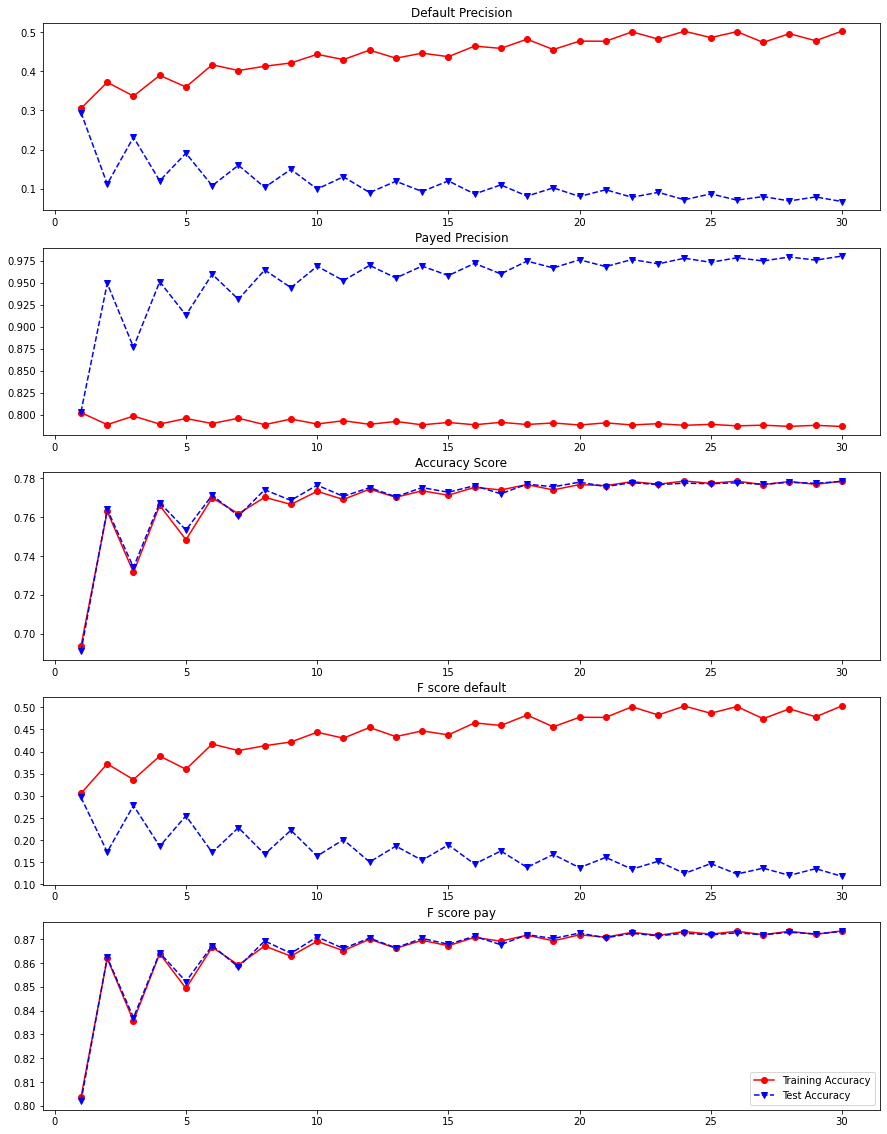

In [9]:
metricsGraphknn(default_prec_man,pay_prec_man,acc_man,default_prec_man,pay_f_measure_man,
                test_default_prec,
                test_pay,
                test_acc, 
                test_default_f,
                test_pay_f,
                [31])


## Euclidean

In [10]:
#Place to store the mean of testing on the fold
default_prec_euc = []
pay_prec_euc = []
acc_euc = []
default_f_measure_euc = []
pay_f_measure_euc = []

#place to store test results
test_default_prec = []
test_pay = []
test_acc = []
test_default_f = []
test_pay_f = []


for k in range(1,31): #The K nearest neigbours
    #Place to store the raw outputs
    av_prec_default = []
    av_pay_prec = []
    av_acc = []
    av_f_default = []
    av_f_pay = []
    
    
    for train_index, test_index in kf.split(x_train,y_train):# Splitting into three folds
        #Taking the elements and putting them into array
        temp_train_x = np.take(x_train,train_index,0)
        temp_train_y = np.take(y_train,train_index,0)

        temp_test_x = np.take(x_train,test_index,0)
        temp_test_y = np.take(y_train,test_index,0)
    
        knn = KNeighborsClassifier(n_neighbors=k,metric='euclidean') #Building the model
        knn.fit(temp_train_x,temp_train_y)#Training model
        
        prediction = knn.predict(temp_test_x)#Working out predictions
        
        #Storing the output metrics
        av_prec_default.append(precision_score(temp_test_y,prediction))
        av_pay_prec.append(precision_score(temp_test_y,prediction,pos_label=0))
        av_acc.append(accuracy_score(temp_test_y,prediction))
        av_f_default.append(f1_score(temp_test_y,prediction))
        av_f_pay.append(f1_score(temp_test_y,prediction,pos_label=0))
        
    #Finding the mean from the storing in the internal loop and storing it to be represented in the graph
    default_prec_euc.append(np.mean(av_prec_default))
    pay_prec_euc.append(np.mean(av_pay_prec))
    acc_euc.append(np.mean(av_acc))
    default_f_measure_euc.append(np.mean(av_f_default))
    pay_f_measure_euc.append(np.mean(av_f_pay))
    
    #Build test model
    testKnn = KNeighborsClassifier(n_neighbors=k,metric='euclidean') #Building the model
    testKnn.fit(x_train,y_train)
    
    pred = testKnn.predict(x_test)
    
    test_default_prec.append( precision_score(pred,y_test))
    test_pay.append(precision_score(pred,y_test,pos_label=0))
    test_acc.append(accuracy_score(pred,y_test))
    test_default_f.append(f1_score(pred,y_test))
    test_pay_f.append(f1_score(pred,y_test,pos_label=0))
    

    


The maximum Default Precision: 0.4889212987947472
The maximum Payed Precision: 0.8003249384066574
The maximum Accuracy Score: 0.7776
The maximum F score default: 0.295885932916941
The maximum F score pay: 0.8730052872961145


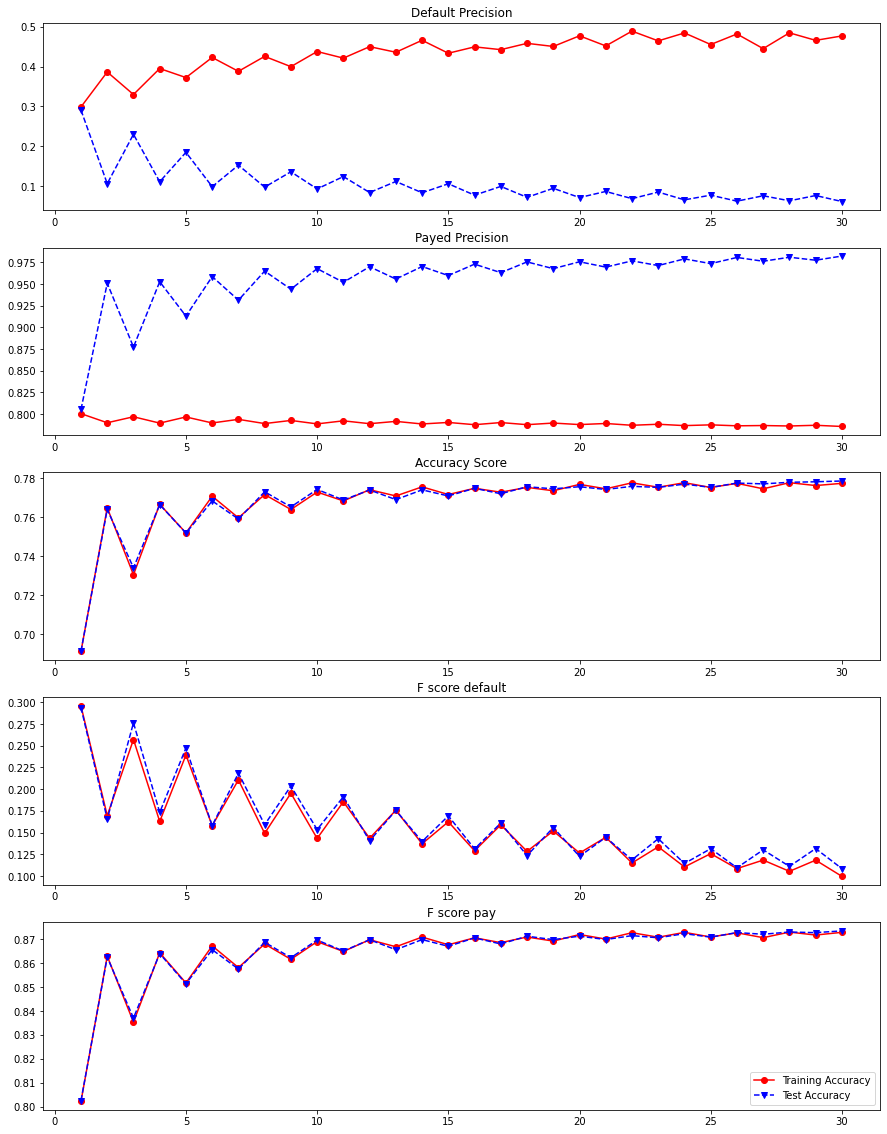

In [11]:
metricsGraphknn(default_prec_euc,pay_prec_euc,acc_euc,default_f_measure_euc,pay_f_measure_euc,
               test_default_prec,
                test_pay,
                test_acc, 
                test_default_f,
                test_pay_f,
                [31])

## Conclusions
The manhattan distance is a better because of its precision with detecting defaults being 2% higher than the euclideans best model and this is not at a large penalty of the precision score for the payed. Which is the goal of the model so the best model so far is the manhattan with 30 neigbours

Q = [2] # The amound of qs in minkoski

#place to store all the minkoski model
default_prec_mink_store = []
pay_prec_mink_store = []
acc_mink_store = []
default_f_measure_mink_store = []
pay_f_measure_mink_store = []


for q in Q:

    #Place to store the mean of testing on the fold
    default_prec_mink = []
    pay_prec_mink = []
    acc_mink = []
    default_f_measure_mink = []
    pay_f_measure_mink = []


    for k in range(1,31): #The K nearest neigbours
        #Place to store the raw outputs
        av_prec_default = []
        av_pay_prec = []
        av_acc = []
        av_f_default = []
        av_f_pay = []


        for train_index, test_index in kf.split(x_train,y_train):# Splitting into three folds
            #Taking the elements and putting them into array
            temp_train_x = np.take(x_train,train_index,0)
            temp_train_y = np.take(y_train,train_index,0)

            temp_test_x = np.take(x_train,test_index,0)
            temp_test_y = np.take(y_train,test_index,0)

            knn = KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=q) #Building the model
            knn.fit(temp_train_x,temp_train_y)#Training model

            prediction = knn.predict(temp_test_x)#Working out predictions

            #Storing the output metrics
            av_prec_default.append(precision_score(temp_test_y,prediction))
            av_pay_prec.append(precision_score(temp_test_y,prediction,pos_label=0))
            av_acc.append(accuracy_score(temp_test_y,prediction))
            av_f_default.append(f1_score(temp_test_y,prediction))
            av_f_pay.append(f1_score(temp_test_y,prediction,pos_label=0))

        #Finding the mean from the storing in the internal loop and storing it to be represented in the graph
        default_prec_mink.append(np.mean(av_prec_default))
        pay_prec_mink.append(np.mean(av_pay_prec))
        acc_mink.append(np.mean(av_acc))
        default_f_measure_mink.append(np.mean(av_f_default))
        pay_f_measure_mink.append(np.mean(av_f_pay))
    
    
    #Storing the metrics for each q to compare
    default_f_measure_mink_store.append([default_prec_mink])
    pay_prec_mink_store.append([pay_prec_mink])
    acc_mink_store.append([acc_mink])
    default_f_measure_mink_store.append([default_f_measure_mink])
    pay_f_measure_mink_store.append([pay_f_measure_mink])
    
    





print(default_f_measure_mink_store)

metricsGraphknn(
default_f_measure_mink_store[0],
pay_prec_mink_store[0],
acc_mink_store[0],
default_f_measure_mink_store[0],
 pay_f_measure_mink_store[0],
    [31]
)


## Random Forests

In [13]:
def randomForestModel(numBaseClassifiers):
    #Place to store mean of random forest 
    default_prec = []
    pay_prec = []
    acc = []
    default_f_measure = []
    pay_f_measure = []
    
    #place to store test results
    test_default_prec = []
    test_pay = []
    test_acc = []
    test_default_f = []
    test_pay_f = []
    
    
    for i in numBaseClassifiers: 
        #Place to store the raw outputs
        av_prec_default = []
        av_pay_prec = []
        av_acc = []
        av_f_default = []
        av_f_pay = []
    
    
        for train_index, test_index in kf.split(x_train,y_train):# Splitting into three folds
            #Taking the elements and putting them into array
            temp_train_x = np.take(x_train,train_index,0)
            temp_train_y = np.take(y_train,train_index,0)

            temp_test_x = np.take(x_train,test_index,0)
            temp_test_y = np.take(y_train,test_index,0)

            forest_train = ensemble.RandomForestClassifier(i) #Building the model
            forest_train.fit(temp_train_x,temp_train_y)#Training model

            prediction = forest_train.predict(temp_test_x)#Working out predictions

            #Storing the output metrics
            av_prec_default.append(precision_score(temp_test_y,prediction))
            av_pay_prec.append(precision_score(temp_test_y,prediction,pos_label=0))
            av_acc.append(accuracy_score(temp_test_y,prediction))
            av_f_default.append(f1_score(temp_test_y,prediction))
            av_f_pay.append(f1_score(temp_test_y,prediction,pos_label=0))
        
        default_prec.append(mean(av_prec_default))
        pay_prec.append(mean(av_pay_prec))
        acc.append(mean(av_acc))
        default_f_measure.append(mean(av_f_default))
        pay_f_measure.append(mean(av_f_pay))
        
        forest_test = ensemble.RandomForestClassifier(i) #Building the model
        forest_test.fit(x_train,y_train)
        pred = forest_test.predict(x_test)
        
        test_default_prec.append(precision_score(pred,y_test))
        test_pay.append(precision_score(pred,y_test,pos_label=0))
        test_acc.append(accuracy_score(pred,y_test))
        test_default_f.append(f1_score(pred,y_test))
        test_pay_f.append(f1_score(pred,y_test,pos_label=0))
        
    metricsGraphknn(default_prec, pay_prec, acc.append, default_f_measure,pay_f_measure,
                    test_default_prec, test_pay, test_acc,test_default_f,test_pay_f,numBaseClassifiers)
    
            
    

The maximum Default Precision: 0.6476656570422255
The maximum Payed Precision: 0.8409744317636179
The maximum Accuracy Score: <built-in method append of list object at 0x000001E435C9A2C8>
The maximum F score default: 0.47224184742903763
The maximum F score pay: 0.8888531205096195


ValueError: x and y must have same first dimension, but have shapes (499,) and (3,)

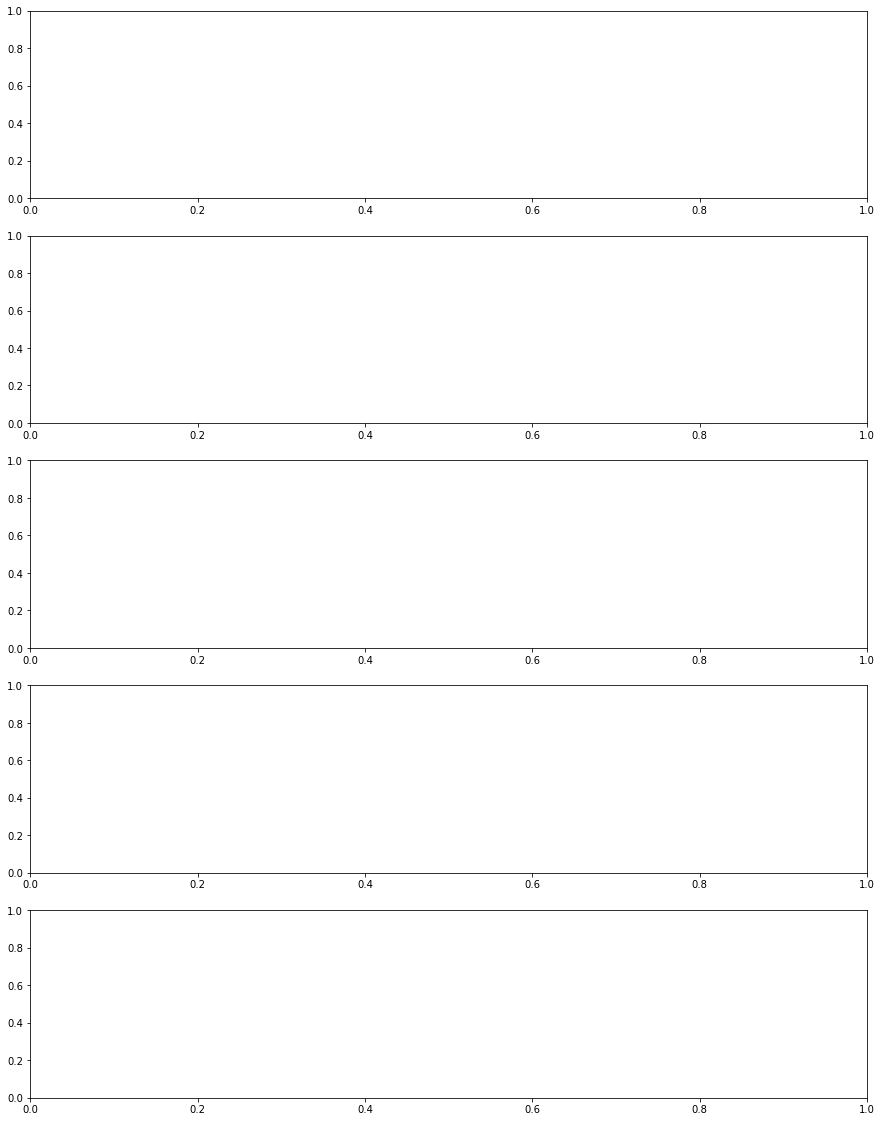

In [14]:
classifiers = [500,750,1000]

randomForestModel(classifiers)

In [16]:
numBaseClassifiers= [500,750,1000]
#Place to store mean of random forest 
default_prec = []
pay_prec = []
acc = []
default_f_measure = []
pay_f_measure = []

#place to store test results
test_default_prec = []
test_pay = []
test_acc = []
test_default_f = []
test_pay_f = []

    
for i in numBaseClassifiers: 
    #Place to store the raw outputs
    av_prec_default = []
    av_pay_prec = []
    av_acc = []
    av_f_default = []
    av_f_pay = []
    
    
    for train_index, test_index in kf.split(x_train,y_train):# Splitting into three folds
        #Taking the elements and putting them into array
        temp_train_x = np.take(x_train,train_index,0)
        temp_train_y = np.take(y_train,train_index,0)

        temp_test_x = np.take(x_train,test_index,0)
        temp_test_y = np.take(y_train,test_index,0)
        forest_train = ensemble.RandomForestClassifier(i) #Building the model
        forest_train.fit(temp_train_x,temp_train_y)#Training model

        prediction = forest_train.predict(temp_test_x)#Working out predictions

            #Storing the output metrics
        av_prec_default.append(precision_score(temp_test_y,prediction))
        av_pay_prec.append(precision_score(temp_test_y,prediction,pos_label=0))
        av_acc.append(accuracy_score(temp_test_y,prediction))
        av_f_default.append(f1_score(temp_test_y,prediction))
        av_f_pay.append(f1_score(temp_test_y,prediction,pos_label=0))
        
    print(mean(av_acc))
    default_prec.append(mean(av_prec_default))
    pay_prec.append(mean(av_pay_prec))
    acc.append(mean(av_acc))
    default_f_measure.append(mean(av_f_default))
    pay_f_measure.append(mean(av_f_pay))
        
    forest_test = ensemble.RandomForestClassifier(i) #Building the model
    forest_test.fit(x_train,y_train)
    pred = forest_test.predict(x_test)
        
    test_default_prec.append(precision_score(pred,y_test))
    test_pay.append(precision_score(pred,y_test,pos_label=0))
    test_acc.append(accuracy_score(pred,y_test))
    test_default_f.append(f1_score(pred,y_test))
    test_pay_f.append(f1_score(pred,y_test,pos_label=0))
        
    
    

0.8156
0.8157333333333333
0.8164666666666667


[0.6450340664711889, 0.6456600058534737, 0.6486349408658414]
The maximum Default Precision: 0.6486349408658414
The maximum Payed Precision: 0.8406762981960535
The maximum Accuracy Score: <built-in method append of list object at 0x000001E461CF39C8>
The maximum F score default: 0.47108446593180725
The maximum F score pay: 0.8889549368278544


TypeError: 'int' object is not subscriptable

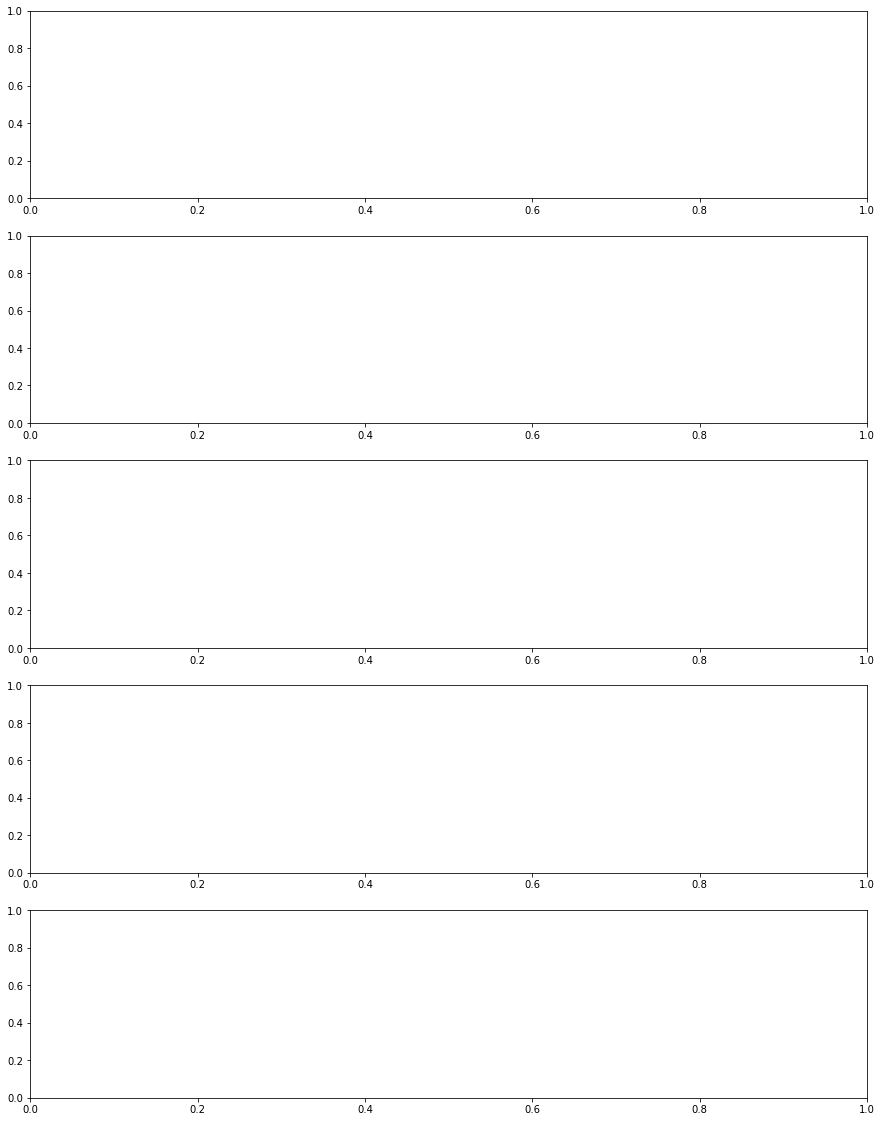

In [26]:
print(default_prec)

metricsGraphknn(default_prec, pay_prec, acc.append, default_f_measure,pay_f_measure,
                    test_default_prec, test_pay, test_acc,test_default_f,test_pay_f,len(numBaseClassifiers))
    
